# Discrete Cosine Transform

## Exercise 2: Simple JPEG Encoder

The Discrete Cosine Transform is the key to JPEG compression. Blocks of $8 \times 8$ pixels are transformed to the frequency domain to be in a format which is more suited for compression. The code template provides you with the pixel values of a given $8 \times 8$ block.

<b>a)</b> In a greyscale image, the pixel values are usually encoded with 8 bit with values in $[0, 255]$. The DCT, however, works on $[-128, 127]$. Write a function that normalises the pixel values.

<b>b)</b> The DCT transforms an $8 \times 8$ block from the spatial domain to the frequency domain. Use

$$\begin{equation}F_{uv} = \frac{1}{\sqrt{2N}} c_u c_v \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} f_{xy} \cos \left(\frac{(2x+1)u\pi}{2N}\right) \cos \left(\frac{(2y+1)v\pi}{2N}\right)
\end{equation}$$

where 

$$\begin{equation}
c_{u;v} = \begin{cases} \frac{1}{\sqrt{2}} & u;v = 0 \\ 1 & \text{otherwise.}\end{cases}
\end{equation}$$
What is the complexity of your DCT routine? What is the meaning of $F_{00}$? 

<b>c)</b> The coefficients $F_{uv}$ are divided by quantisation values $Q_{uv}$ and rounded to the nearest integer. Quantisation is a lossy process; high quantisation coefficients result in a high compression factor, though at the expense of image quality. Implement the quantisation step. A common choice for the quantisation matrix is given in the code template. As mentioned in the lecture, a full JPEG encoder would now apply further compression techniques.  

<b>d)</b> Derive the IDCT and write a decoder for our simple JPEG block encoder. Compare the original image with the subsequently encoded and then decoded image.

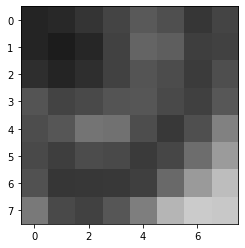

<ipython-input-1-6d3ce58e6bac>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return block - 128*np.ones((8,8), dtype=np.int)
<ipython-input-1-6d3ce58e6bac>:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

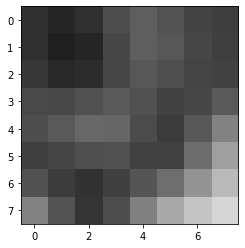

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import dtype


Cosines = np.zeros((8,8))
Coeffs  = np.ones((8,8))
qtable = np.matrix( [[ 16,  11,  10,  16,  24,  40,  51,  61],
                     [ 12,  12,  14,  19,  26,  58,  60,  55],
                     [ 14,  13,  16,  24,  40,  57,  69,  56],
                     [ 14,  17,  22,  29,  51,  87,  80,  62],
                     [ 18,  22,  37,  56,  68, 109, 103,  77],
                     [ 24,  35,  55,  64,  81, 104, 113,  92],
                     [ 49,  64,  78,  87, 103, 121, 120, 101],
                     [ 72,  92,  95,  98, 112, 100, 103,  99]])


def normalise(block):
    '''
    Shift pixel values of an 8-by-8 matrix to [-128, 127]
    '''
    return block - 128*np.ones((8,8), dtype=np.int)


def denormalise(block):
    '''
    Shift pixel values to [0, 255]
    '''
    return block + 128*np.ones((8,8), dtype=np.int)


def dct(block):
    '''
    DCT matrix for an 8-by-8 block
    '''
    dctBlock = np.zeros((8,8)) 
         
    for i in range(0,8):
        for j in range(0,8):
            blockSum = 0.
            for x in range(0,8):
                for y in range(0,8):
                    pixel = block[x,y]
                    blockSum = blockSum + pixel * Cosines[x,i] * Cosines[y,j]
            dctBlock[i,j] = int(0.25 * Coeffs[i,j] * blockSum)
            
    return dctBlock


def idct(block):
    '''
    inverse DCT for an 8-by-8 block
    '''
    image = np.zeros((8,8)) 
         
    for x in range(0,8):
        for y in range(0,8):
            blockSum = 0.
            for u in range(0,8):
                for v in range(0,8):
                    blockSum = blockSum + Coeffs[u,v] * block[u,v] * Cosines[x,u] * Cosines[y,v]
            image[x,y] = int(0.25 * blockSum)
            
    return image

    
def quantise(block):
    '''
    Lossy compression through quantisation of DCT-coefficients
    '''   
    return np.round(block/qtable, 0)


def dequantise(block):
    '''
    Dequantise the DCT coefficients
    '''
    return np.multiply(qtable, block)


def encodeBlock(block):
    '''
    JPEG-encode an 8-by-8 block (no lossless compression)
    '''
    normalisedBlock = normalise(block)
    dctBlock = dct(normalisedBlock)
    quantisedBlock = quantise(dctBlock)
    return quantisedBlock


def decodeBlock(block):
    '''
    Decode an 8-by-8 block for your simple JPEG encoder
    '''
    return denormalise(idct(dequantise(block)))


# values in [0, 255]
image = np.matrix([[ 37, 41,  53,  68,  89,  79,  54,  68],
                   [ 36, 28,  38,  65, 100,  94,  62,  65],
                   [ 46, 36,  46,  66,  84,  76,  59,  78],
                   [ 84, 67,  73,  84,  86,  73,  64,  87],
                   [ 77, 86, 116, 113,  77,  57,  79, 129],
                   [ 73, 62,  76,  74,  58,  70, 109, 155],
                   [ 82, 54,  55,  57,  63, 105, 154, 189],
                   [121, 73,  65,  86, 126, 181, 203, 200]], dtype=int)

plt.imshow(image, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

# compute lookup tables
for x in range(0,8):
    for y in range(0,8):
        Cosines[x,y] = np.cos((2.*x+1)*y*np.pi/16)
        
vec = np.array([1/np.sqrt(2), 1, 1, 1, 1, 1, 1, 1])
Coeffs = np.outer(vec, vec)

# encode and decode the given block 
encodedBlock = encodeBlock(image)
decodedImage = decodeBlock(encodedBlock)
plt.imshow(decodedImage, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

## Exercise 3: Discrete Cosine Transform

We start with a dataset $f_{-N+1}, \ldots, f_N$, which fulfills the following
symmetry constraint:
\begin{equation}
      f_{-n} = f_n \qquad \mbox{for $n=1,\ldots, N-1$}
\end{equation}

<b>a)</b> Show that the corresponding Fourier coefficients
   $$\begin{equation}
      F_k = \frac{1}{2N}
            \sum\limits_{n=-N+1}^{N} f_n \omega_{2N}^{-kn}
   \end{equation}$$
   are real values only and can be written as:
   
   $$\begin{equation}
     F_k = \frac{1}{N} \left( \frac{1}{2} f_0 + \sum\limits_{n=1}^{N-1} f_n \cos\left( \frac{\pi nk}{N} \right)+\frac{1}{2} f_N \cos(\pi k)\right).
   \end{equation}$$

<b>b)</b> Show that the $F_k$ is symmetric too.

<b>c)</b>
Let $FFT(f)$ be a procedure that computes the coefficients $F_k$
efficiently.

Write a short procedure $my\_dct(g)$ which uses procedure $FFT$
to compute the coefficients $F_k$ for $k=0,\ldots, N$ 
for the (non-symmetrical) data $f_0,\ldots,f_N$.

In [1]:
# given fft procedure
def fft(f):
    from scipy.fftpack import fft as unscaled_fft
    return list(map(lambda x : x/len(f), unscaled_fft(f)))


def my_dct(g):
    f = g + g[-2:0:-1]
    F = fft(f)
    return F[:len(g)]


## test

# test direct implementation of dct
import math
def dct(g):
    N = len(g)-1
    return [1/N*(sum([g[n]*math.cos(math.pi*k*n/N) for n in range(1,N)])+g[0]/2+g[N]/2*math.cos(math.pi*k)) for k in range(N+1)]


g = [0.0, -1.0, 2.0, 4.0, 5.0, 6.0]
print("my_dct:" + str(list(map(lambda x : x.real, my_dct(g))))) # remove imaginary part caused by rounding error (in the 10^-16)
print("re dct:" + str(dct(g)))


my_dct:[2.6, -1.694427190999916, -0.12360679774997899, 0.09442719099991592, 0.323606797749979, 0.2]
re dct:[2.6, -1.6944271909999156, -0.12360679774997917, 0.0944271909999161, 0.323606797749979, 0.2]
